In [35]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [36]:
df = pd.read_csv('train.csv', usecols = ['Age','Fare','Survived'] )

In [37]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [38]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

/var/folders/k5/m5y73k4n41d0_vmt2kk4st180000gn/T/ipykernel_22982/1170723599.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


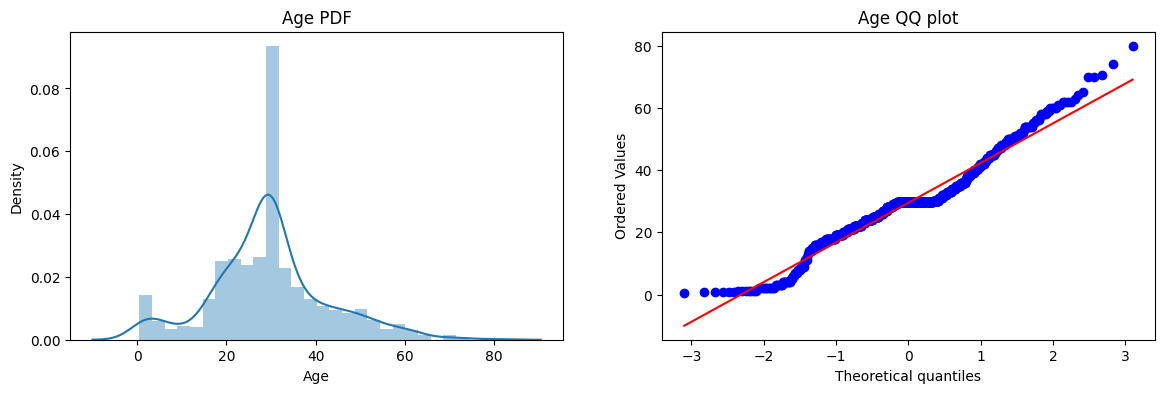

In [41]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ plot')

plt.show()

/var/folders/k5/m5y73k4n41d0_vmt2kk4st180000gn/T/ipykernel_22982/3307492177.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


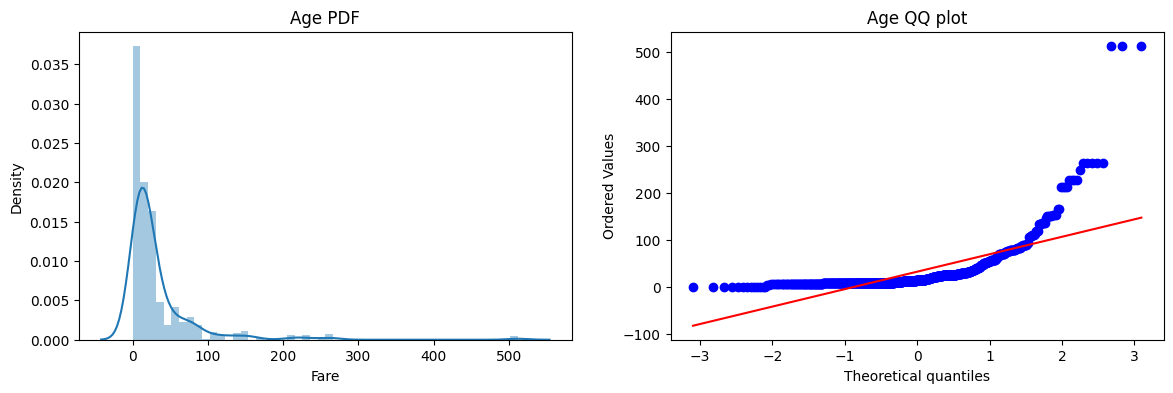

In [42]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Age QQ plot')

plt.show()

In [45]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [63]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_pred2=clf2.predict(x_test)

print('Accuracy LR', accuracy_score(y_pred, y_test))
print('Accuracy DT', accuracy_score(y_pred2, y_test))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6703910614525139


In [65]:
trf = FunctionTransformer(func=np.log1p)

In [66]:
x_train_transform = trf.fit_transform(x_train)
x_test_transform = trf.transform(x_test)

In [67]:
clf.fit(x_train_transform,y_train)
clf2.fit(x_train_transform,y_train)

y_pred = clf.predict(x_test_transform)
y_pred2=clf2.predict(x_test_transform)

print('Accuracy LR', accuracy_score(y_pred, y_test))
print('Accuracy DT', accuracy_score(y_pred2, y_test))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6871508379888268
